# Exercice sur des données persos

## Récupération des données

Récupération d'un listing de notes persos au format markdown.

```shell
ls 20* -d > tree.txt
```

In [25]:
import csv
from os import getcwd, listdir

listFiles = []
with open('tree.txt', 'r', encoding='utf8') as myFile:
    myReader = csv.reader(myFile)
    for row in myReader:
        listFiles += row
listFiles

['20200404193723_FirstNote.md',
 '20200404193815_SecondNote.md',
 '20200404193815_SecondNote.pdf',
 '20200406120140_PythonSciBasics.html',
 '20200406120140_PythonSciBasics.md',
 '20200406120140_PythonSciBasics.pdf',
 '20200406222521_OutilsPourMieuxCoder.md',
 '20200407101411_AnalyseSensibilite.md',
 '20200407102544_LTspice2latex.md',
 '20200407105048_latex2svg.md',
 '20200407171447_repetabiliteMesures.html',
 '20200407171447_repetabiliteMesures.md',
 '20200407172558_fideliteMesures.html',
 '20200407172558_fideliteMesures.md',
 '20200407172757_reproductibiliteMesures.html',
 '20200407172757_reproductibiliteMesures.md',
 '20200407174039_RechercheReproductible.md',
 '20200413171110_ExemplesCodesNonReproductibles.md',
 '20200413173245_GuideBonnesPratiquesNumeriquesBD.html',
 '20200413173245_GuideBonnesPratiquesNumeriquesBD.md',
 '20200413173245_GuideBonnesPratiquesNumeriquesBD.pdf',
 '20200501100000_DesignEcolo_EchangeEliseDiscord.md',
 '20200501115700_IAecolo_EchangeClementineDiscord.md',

Séparation des notes et de leur dossier de pièces jointes :

In [28]:
notes = []
directories = []
for file in listFiles:
    if file[-1]=="/":
        directories += [file]
    else:
        notes += [file]

print(directories)
print(notes)

['20200509142300_img/', '20200515104700_img/', '20200515142200_doc/', '20200516161400_img/']
['20200404193723_FirstNote.md', '20200404193815_SecondNote.md', '20200404193815_SecondNote.pdf', '20200406120140_PythonSciBasics.html', '20200406120140_PythonSciBasics.md', '20200406120140_PythonSciBasics.pdf', '20200406222521_OutilsPourMieuxCoder.md', '20200407101411_AnalyseSensibilite.md', '20200407102544_LTspice2latex.md', '20200407105048_latex2svg.md', '20200407171447_repetabiliteMesures.html', '20200407171447_repetabiliteMesures.md', '20200407172558_fideliteMesures.html', '20200407172558_fideliteMesures.md', '20200407172757_reproductibiliteMesures.html', '20200407172757_reproductibiliteMesures.md', '20200407174039_RechercheReproductible.md', '20200413171110_ExemplesCodesNonReproductibles.md', '20200413173245_GuideBonnesPratiquesNumeriquesBD.html', '20200413173245_GuideBonnesPratiquesNumeriquesBD.md', '20200413173245_GuideBonnesPratiquesNumeriquesBD.pdf', '20200501100000_DesignEcolo_Echange

## Calcul du nombre de notes écrites par jour

Pour ce faire on retrouve la date dans le nom de chaque note. Et on compte le nombre de notes écrite pour ce jour. Chaque jour depuis la première date est analysé, même sans notes.

In [104]:
import datetime
import numpy as np

firstNote = notes[0]
lastNote = notes[-1]

# retrieve date from filename
def findDate(filename):
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
    return(datetime.datetime(year, month, day))
    
startDate = findDate(firstNote)
endDate = findDate(lastNote)

# build the days vector
dayVect = np.arange(startDate, endDate + datetime.timedelta(days=1), datetime.timedelta(days=1)).astype(datetime.date)
dayVectList = [startDate + datetime.timedelta(days=i) for i in range((endDate-startDate).days+1)]

notesCount = np.zeros(len(dayVect))
for note in notes:
    curDate = findDate(note)
    curInd = np.where(curDate == dayVect)
    notesCount[curInd] += 1

pjCount = np.zeros(len(dayVect))
for mydir in directories:
    curDate = findDate(mydir)
    curInd = np.where(curDate == dayVect)
    pjCount[curInd] += 1

In [105]:
dayVect == findDate(notes[3])

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [106]:
notesCount

array([ 3.,  0.,  4., 10.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
        0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.])

## Présentation des résultats

Affichage sous forme de bar du nombre de notes écrites par jour.


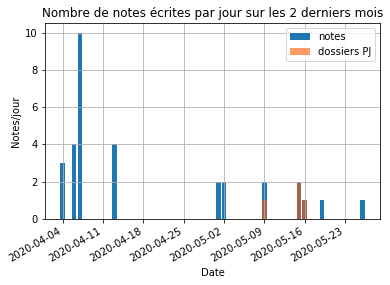

In [124]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

# grouped bar manual
x = np.arange(len(dayVect))

fig,ax = plt.subplots()
ax.bar(dayVect, notesCount, label='notes')
ax.bar(dayVect, pjCount, label='dossiers PJ', color='#ff550099')
plt.title('Nombre de notes écrites par jour sur les 2 derniers mois')
plt.xlabel('Date')
plt.ylabel('Notes/jour')
plt.grid()
plt.legend()
fig.autofmt_xdate()


Nombre moyen de notes écrit par jour :

In [65]:
notesCount.mean()

0.6792452830188679

In [125]:
notesCount.max()

10.0

In [126]:
pjCount.mean()

0.07547169811320754